In [152]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

### We will use two functions imported from read_data: get_fn_list() and build_tables().
### Build tables takes a filename to one an output file from a simulation and turns it into an astropy table.
### If we want a list of filenames, we can use the function get_fn_list(), which takes as inputs the directory
### to the outputs folder, the number of the first file we want to read, and the number of the last file. It then
### returns a list of the correct filenames which we can then feed to build_table().

In [168]:
pref = '../outputs/evolve_rmin60_rad_'
ngrid = 1000
tgrid = 1000
data_ngrid = 200
HoR=1e-3
full_data = build_data(pref,ngrid,tgrid,data_ngrid,convert=False,HoR=HoR,order=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


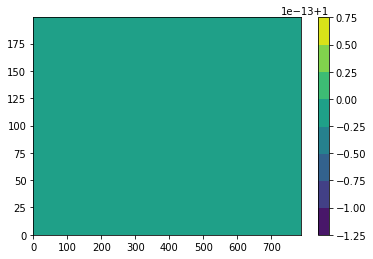

In [89]:
# should be 1 everywhere; verifies that the conversion from code to physical coordinates was done correctly

plt.contourf(full_data["t"][:,:]/full_data["T"][:,:])
plt.colorbar()

In [169]:
## check for mass conservation

init_mass = np.sum(full_data["sigma"][:,1]*2.*np.pi*full_data["r"][:,1]*full_data["dr"][:,1])
for i in range(tgrid):
    print ( np.sum(full_data["sigma"][:,i]*2.*np.pi*full_data["r"][:,i]*full_data["dr"][:,i]) - init_mass)/init_mass

-0.001240041141970738
0.0
-0.0006831306521011471
-0.010473774990484483
-0.014788413232201902
-0.01774869608720978
-0.020840270275790003
-0.02404890795789408
-0.02777964227875107
-0.031962968573486746
-0.03717033914061506
-0.043432023753249276
-0.04970838510183861
-0.05574265077182093
-0.06116142548802831
-0.06651679212586731
-0.07208244390716467
-0.07829124341269818
-0.08451450110139296
-0.09053076413734032
-0.09589036847850803
-0.10104361430525687
-0.10637928781015481
-0.11221758250997661
-0.11800628934589708
-0.123616263638334
-0.1287415678157358
-0.133789980185864
-0.1387722823976239
-0.14388735568875843
-0.14889080198236734
-0.15372597068886903
-0.15835755398053758
-0.16297130539440524
-0.16758795868458112
-0.1721955355786246
-0.17678086397265205
-0.1811599219227349
-0.18536560362381074
-0.18966392554912243
-0.19389285192364375
-0.19803907791108025
-0.2020643203071437
-0.20596122401485056
-0.20988342125480064
-0.21369881567179716
-0.21727115945328485
-0.22098302628176797
-0.2245487

-0.6407023697664647
-0.6410651467894085
-0.6414485372499721
-0.641894010568672
-0.6423297305956539
-0.6427327469176869
-0.6430910674144013
-0.6434684434709124
-0.6439100518860504
-0.6443441239930976
-0.644746141854669
-0.6451002419337258
-0.645471818008893
-0.6459092353175788
-0.6463417166076919
-0.646742779171864
-0.6470929672250348
-0.6474588615752304
-0.6478917914774519
-0.6483227705923996
-0.6487229023456929
-0.6490694399327038
-0.6494298160169417
-0.6498579861694261
-0.650287576140314
-0.6506867499229757
-0.6510299192454699
-0.6513848986584688
-0.6518080218563939
-0.6522363789911303
-0.6526345648572729
-0.652974649696646
-0.6533243342492804
-0.6537421409167498
-0.6541693873707614
-0.654566524345194
-0.6549038447693383
-0.655248314086817
-0.6556605397469494
-0.6560868146213972
-0.6564828854700863
-0.6568177104943534
-0.6571570775520146
-0.6575634959636657
-0.6579888928050757
-0.6583838680112234
-0.6587164435608888
-0.6590507909199571
-0.6594513164543402
-0.6598758054704255
-0.66026

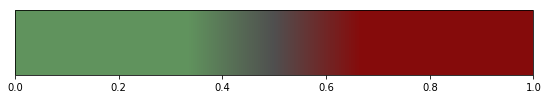

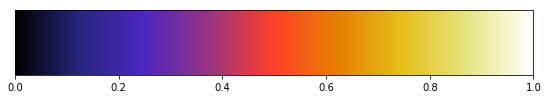

In [145]:
# construct custom colormap for Bernoulli number
from matplotlib.colors import LinearSegmentedColormap
from colour import Color

c3 = '#850B0B'
c2 = '#4F4F4F'
c1 = '#60935D'
clist =  list(Color(c1).range_to(Color(c1),4))[:-1]
clist += list(Color(c2).range_to(Color(c2),2))[:-1]
clist += list(Color(c3).range_to(Color(c3),4))[:-1]

for k in range(len(clist)):
    clist[k] = str(clist[k])
cm = LinearSegmentedColormap.from_list('my_cmap', clist, N=256)

## compare to CMRmap

# our cmap
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cm)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()

# cmr map
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=plt.get_cmap("CMRmap"))
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)

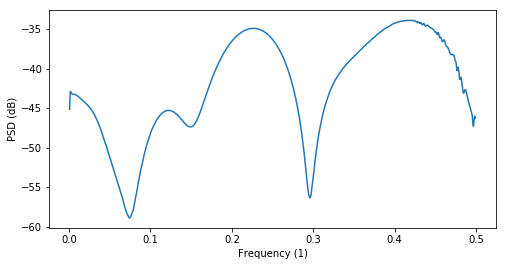

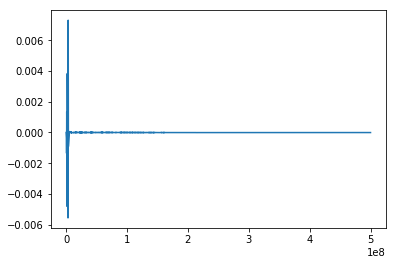

0.0


In [170]:
plot_mdot = full_data["mdot"][100,:]
#print plot_mdot
plot_t = full_data["t"][100,:]
plot_t = plot_t#/np.max(plot_t)

#select_times = plot_t < 0.1*np.max(plot_t)
#plot_t = plot_t[plot_t < 0.1*np.max(plot_t)]
#plot_mdot = plot_mdot[plot_t < 0.1*np.max(plot_t)]
#print np.shape(plot_mdot),np.shape(plot_t)

import scipy.fftpack
mdot_fft = scipy.fftpack.fft(plot_mdot)
mdot_psd = np.abs(mdot_fft)**2.
freq_fft = scipy.fftpack.fftfreq(len(mdot_psd), 1.)
pos_freq = freq_fft > 0

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(freq_fft[pos_freq], 10 * np.log10(mdot_psd[pos_freq]))
#\ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1)')
ax.set_ylabel('PSD (dB)')
plt.show()
plt.clf()

plt.plot(plot_t,plot_mdot)
#plt.xlim(0.0,0.1)
#plt.yscale('log')
#plt.ylim(-1,1)
plt.show()
print plot_t[0]

(200, 1278)
55.65377934539771


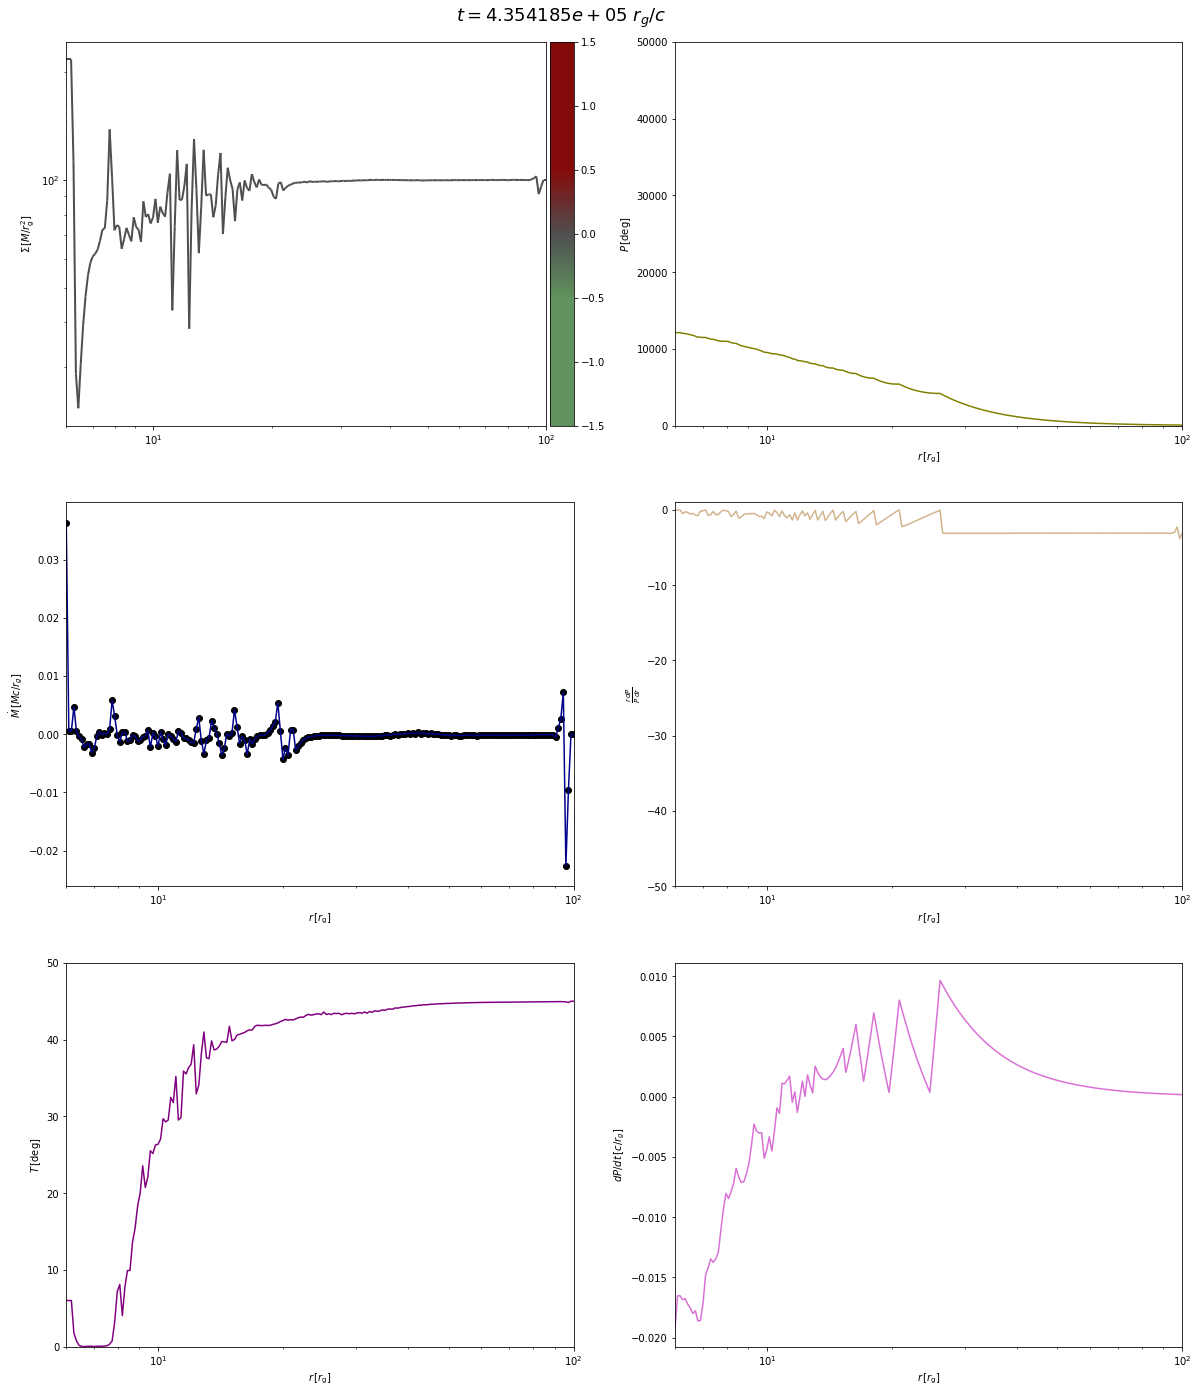

'for i in range(5000,5200,50):\n    fig = plot_interface(full_data,i)\n    plt.show()'

In [179]:
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_interface(table,ind):
    plot_r = table["r"][:,ind]
    plot_d = table["sigma"][:,ind]
    plot_t = table["tilt"][:,ind]
    plot_s = table["s"][:,ind]
    plot_p = table["prec"][:,ind]
    plot_rdpdr = table["rdpdr"][:,ind]/plot_p
    plot_dpdt  = table["dpdt"][:,ind]
    plot_mdot  = table["mdot"][:,ind]
    
    time = np.average(table["t"][:,ind])

    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))

    points = np.array([plot_r, plot_d]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cm,
        norm=plt.Normalize(-1.5,1.5))
    lc.set_array(plot_s)
    lc.set_linewidth(2)
    
    plot = ax[0][0].add_collection(lc)
    ax[0][0].set_ylabel(r'$\Sigma\,[M/r_{\rm g}^2]$')
    ax[0][0].set_xlim(rmin,rmax)
    #ax[0][0].set_ylim(1e-5,8e4)
    ax[0][0].set_xscale('log')
    ax[0][0].set_yscale('log')
    divider = make_axes_locatable(ax[0][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
    ax[1][0].plot(plot_r,plot_mdot,color='darkblue')
    ax[1][0].scatter(plot_r,plot_mdot,color='black')
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$\dot{M}\,[Mc/r_g]$')
    #ax[1][0].set_ylim(-2e-2,2e-2)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')

    ax[2][0].plot(plot_r,plot_t,color='purple')
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[2][0].set_ylim(0,50)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')

    ax[0][1].plot(plot_r,plot_p,color='olive')
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$P\,[{\rm deg}]$')
    ax[0][1].set_ylim(0,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    #ax[0][1].set_yscale('log')

    ax[1][1].plot(plot_r,plot_rdpdr,color='tan')
    ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][1].set_ylabel(r'$\frac{r}{P}\frac{dP}{dr}$')
    ax[1][1].set_ylim(-50,1)
    ax[1][1].set_xlim(rmin,rmax)
    ax[1][1].set_xscale('log')

    ax[2][1].plot(plot_r,plot_dpdt,color='orchid')
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$dP/dt\,[c/r_g]$')
    #ax[2][1].set_ylim(-2,2)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    
    #title = "t = %s"
    plt.title(r"$t = %e \,\,r_g/c$" % time,fontsize=18,pad=20)
    
    return fig
#fig = plot_interface(full_data,5000)
#plt.savefig('alignment_front_early.png')
#plt.show()
print np.shape(full_data["r"])
print np.min(full_data["sigma"][:,10])
fig = plot_interface(full_data,2)
plt.show()
'''for i in range(5000,5200,50):
    fig = plot_interface(full_data,i)
    plt.show()'''

### Lets make a plotting interface, which we can test for one of our tables. 

### Lets say we want to plot the quantities as a movie. We do this by making .png frames of each snapshot and then combining them into a movie using ffmpeg. 
### We iterate through each table that we have generated, then we use our plotting interface to get the figure from matplotlib that we want. 
### Then, we just save this as a series of .png files. From command line, we can do this using ffmpeg, for instance:
### "ffmpeg -r 5 -s 1920x1080 -i tilt_%03d.png test.mp4"
### -r sets the frames per second; -s sets the resolution; -i sets the files we want to read, where %03d indicates we're look for integers of length 3, i.e. 1 --> 001, 10 --> 010, etc; and then test.mp4 is just the name of our file.
### We can do this interactively in jupyter notebook (auto = 1) and remove the .png files afterwards, if we want, as well (clean = 1)

In [14]:
print range(0,10000,50)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 85

In [11]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/inner_a1_h02_plm_6panel_short_q2d_gr"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,1000,2):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface(full_data,i)
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/nkaaz/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>